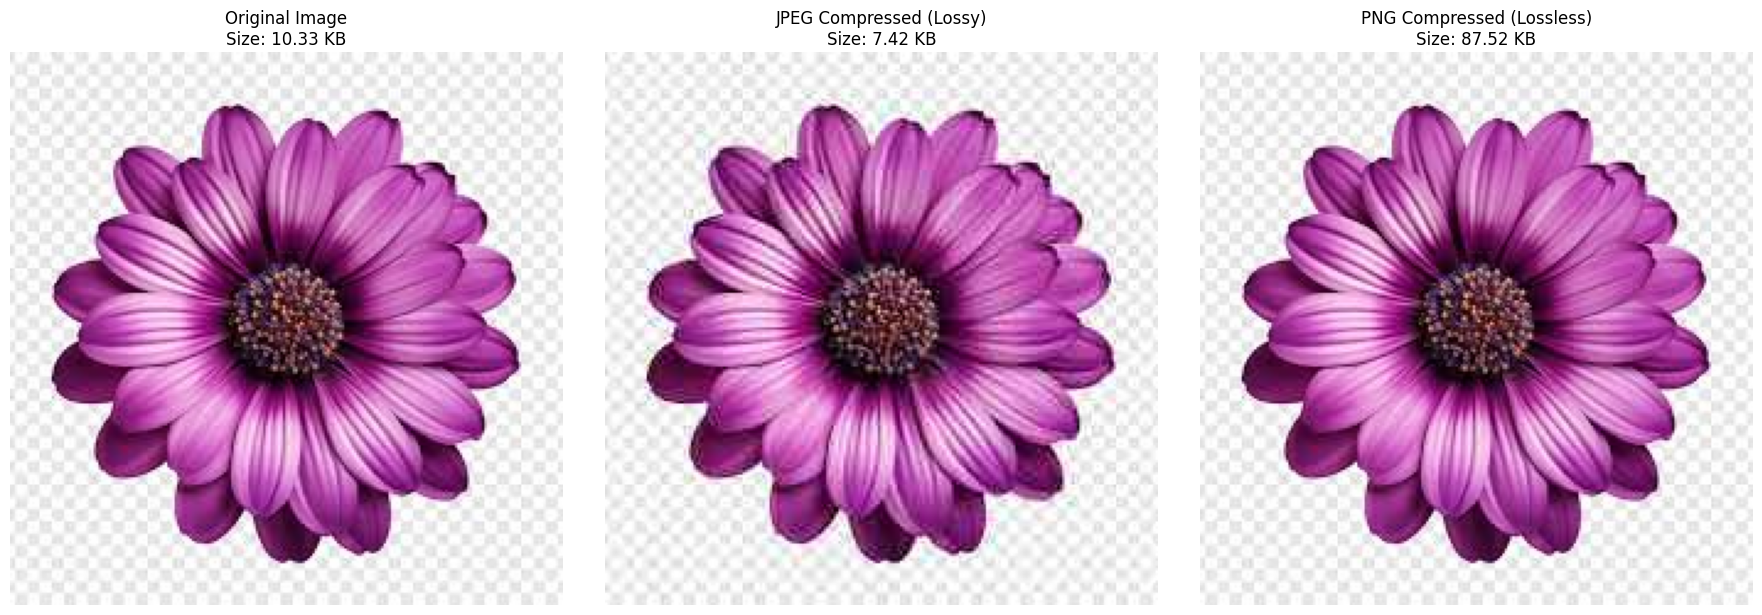

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set your image file path
image_path = "/content/cv_1.jpg"  # Replace with your actual image path

# Open the original image
original_image = Image.open(image_path).convert("RGB")

# Compress the image using JPEG (lossy compression)
jpeg_path = "compressed_lossy.jpg"
original_image.save(jpeg_path, "JPEG", quality=30)  # quality=30 provides significant compression

# Compress the image using PNG (lossless compression)
png_path = "compressed_lossless.png"
original_image.save(png_path, "PNG", optimize=True)

# Reload the compressed images
compressed_lossy = Image.open(jpeg_path)
compressed_lossless = Image.open(png_path)

# Calculate file sizes in kilobytes (KB)
original_size = os.path.getsize(image_path) / 1024
jpeg_size = os.path.getsize(jpeg_path) / 1024
png_size = os.path.getsize(png_path) / 1024

# Plot and display the images along with their file sizes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(original_image)
axes[0].set_title(f"Original Image\nSize: {original_size:.2f} KB")
axes[0].axis("off")

axes[1].imshow(compressed_lossy)
axes[1].set_title(f"JPEG Compressed (Lossy)\nSize: {jpeg_size:.2f} KB")
axes[1].axis("off")

axes[2].imshow(compressed_lossless)
axes[2].set_title(f"PNG Compressed (Lossless)\nSize: {png_size:.2f} KB")
axes[2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
pip install tensorflow scikit-learn matplotlib


Running MNIST Experiment:
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training MNIST model...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 - 6s - 100ms/step - accuracy: 0.7947 - loss: 0.6805 - val_accuracy: 0.3405 - val_loss: 2.0487
Epoch 2/50
63/63 - 5s - 80ms/step - accuracy: 0.9384 - loss: 0.2118 - val_accuracy: 0.3745 - val_loss: 2.3988
Epoch 3/50
63/63 - 4s - 70ms/step - accuracy: 0.9523 - loss: 0.1533 - val_accuracy: 0.5245 - val_loss: 2.3748
Epoch 4/50
63/63 - 6s - 89ms/step - accuracy: 0.9688 - loss: 0.0997 - val_accuracy: 0.5520 - val_loss: 2.1424
Epoch 5/50
63/63 - 5s - 73ms/step - accuracy: 0.9729 - loss: 0.0853 - val_accuracy: 0.6225 - val_loss: 1.5525
Epoch 6/50
63/63 - 4s - 70ms/step - accuracy: 0.9781 - loss: 0.0691 - val_accuracy: 0.7335 - val_loss: 0.9567
Epoch 7/50
63/63 - 5s - 81ms/step - accuracy: 0.9806 - loss: 0.0597 - val_accuracy: 0.8755 - val_loss: 0.4041
Epoch 8/50
63/63 - 5s - 80ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9210 - val_loss: 0.2564
Epoch 9/50
63/63 - 6s - 88ms/step - accuracy: 0.9885 - loss: 0.0377 - val_accuracy: 0.9650 - val_loss: 0.1197
Epoch 10/50
63/63 - 

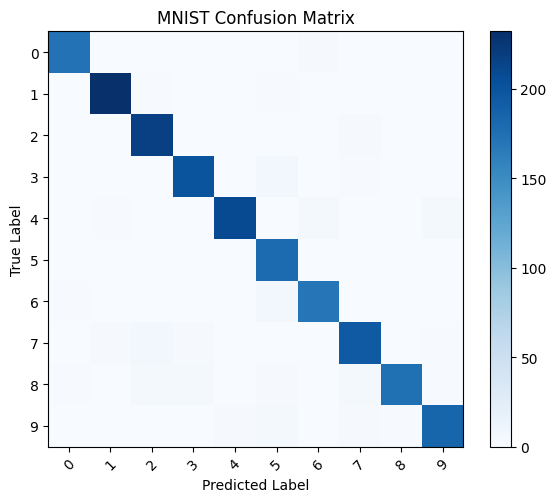

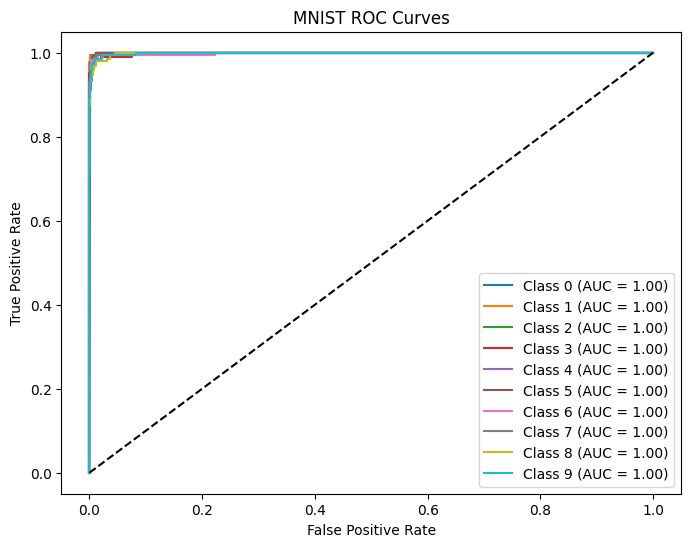


Running CIFAR-10 Experiment:
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CIFAR-10 model...
Epoch 1/50
125/125 - 34s - 274ms/step - accuracy: 0.2944 - loss: 2.2792 - val_accuracy: 0.1100 - val_loss: 3.4573
Epoch 2/50
125/125 - 30s - 240ms/step - accuracy: 0.4069 - loss: 1.6303 - val_accuracy: 0.1925 - val_loss: 3.3955
Epoch 3/50
125/125 - 41s - 327ms/step - accuracy: 0.4685 - loss: 1.4597 - val_accuracy: 0.3415 - val_loss: 2.2659
Epoch 4/50
125/125 - 41s - 332ms/step - accuracy: 0.5109 - loss: 1.3603 - val_accuracy: 0.4795 - val_loss: 1.5190
Epoch 5/50
125/125 - 40s - 318ms/step - accuracy: 0.5537 - loss: 1.2409 - val_accuracy: 0.5085 - val_loss: 1.3979
Epoch 6/50
125/125 - 42s - 333ms/step - accuracy: 0.5832 - loss: 1.1714 - val_accuracy: 0.5880 - val_loss: 1.1826
Epoch 7/50
125/125 - 41s - 331ms/step - accuracy: 0.6241 - loss: 1.0414 - val_accuracy: 0.6005 - val_loss: 1.1704
Epoch 8/50
125/125 - 40s - 323ms/step - accuracy: 0.6455 - loss: 0.9851 - val_accuracy: 0.6030 - val_loss: 1.0967
Epoch 9/50
125/125 - 41s - 329ms/step - accuracy: 0.6758 - lo

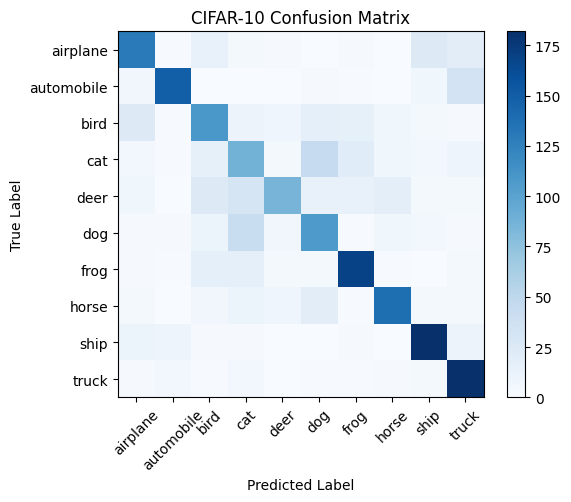

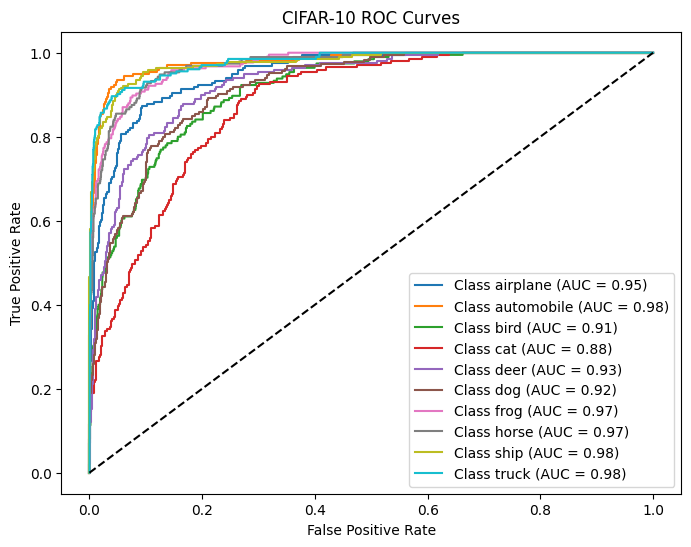

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize # used for multi class classification

def build_mnist_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, kernel_size=(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    # categorical cross entropy: one hot encoded

def build_cifar_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(model, X_test, y_test, dataset_name, class_names):
    # Evaluate overall accuracy
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{dataset_name} - Test Accuracy: {scores[1]*100:.2f}%")

    # Get predictions and convert to class labels
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Classification Report (Precision, Recall, F1-score)
    print(f"\nClassification Report for {dataset_name}:\n",
          classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Compute ROC and AUC for each class (one-vs-all)
    y_test_bin = y_test  # already one-hot encoded
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{dataset_name} ROC Curves")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

def run_mnist_experiment(subset=False):
    # Load MNIST data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # Optionally use a subset (to speed up training)
    if subset:
        X_train, y_train = X_train[:10000], y_train[:10000]
        X_test, y_test = X_test[:2000], y_test[:2000]

    # Preprocess: reshape and normalize. MNIST images are grayscale (28, 28, 1)
    X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.
    X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.

    num_classes = 10
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat = to_categorical(y_test, num_classes)

    model = build_mnist_model(input_shape=(28, 28, 1), num_classes=num_classes)
    print("Training MNIST model...")
    model.fit(X_train, y_train_cat, epochs=50, batch_size=128, validation_split=0.2, verbose=2)

    class_names = [str(i) for i in range(num_classes)]
    evaluate_model(model, X_test, y_test_cat, "MNIST", class_names)

def run_cifar_experiment(subset=False):
    # Load CIFAR-10 data
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    # Optionally use a subset (to speed up training)
    if subset:
        X_train, y_train = X_train[:10000], y_train[:10000]
        X_test, y_test = X_test[:2000], y_test[:2000]

    # Preprocess: normalize data. CIFAR-10 images are in color (32, 32, 3)
    X_train = X_train.astype("float32") / 255.
    X_test = X_test.astype("float32") / 255.

    num_classes = 10
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat = to_categorical(y_test, num_classes)

    model = build_cifar_model(input_shape=(32, 32, 3), num_classes=num_classes)
    print("Training CIFAR-10 model...")
    model.fit(X_train, y_train_cat, epochs=50, batch_size=64, validation_split=0.2, verbose=2)

    # Define class names for CIFAR-10
    class_names = ['airplane','automobile','bird','cat','deer',
                   'dog','frog','horse','ship','truck']
    evaluate_model(model, X_test, y_test_cat, "CIFAR-10", class_names)

if __name__ == "__main__":
    # Set subset=True to use only a portion of the dataset (for quicker experiments)
    print("Running MNIST Experiment:")
    run_mnist_experiment(subset=True)

    print("\nRunning CIFAR-10 Experiment:")
    run_cifar_experiment(subset=True)
